In [3]:
import numpy as np
import pandas as pd
import csv
import re

In [4]:
rawdata = pd.read_csv('raw_data/training_set_no_time.csv', encoding = "ISO-8859-1")

In [5]:
rawdata.head()

,Engagements,Followers at Posting,Type,Description
0,502093,36984682,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,Video,@giannis_an34 goes baseline early to rock the ...


In [9]:
rawdata['len_text'] = list(map(lambda x: len(str(x)), rawdata['Description']))

In [10]:
rawdata['word_ct'] = list(map(lambda x: str(x).count(' '), rawdata['Description']))

In [11]:
rawdata['excl_ct'] = list(map(lambda x: str(x).count('!'), rawdata['Description']))

In [12]:
rawdata['ques_ct'] = list(map(lambda x: str(x).count('??'), rawdata['Description']))

In [13]:
rawdata['period_ct'] = list(map(lambda x: str(x).count('.'), rawdata['Description']))

In [14]:
rawdata['comma_ct'] = list(map(lambda x: str(x).count(','), rawdata['Description']))

In [15]:
rawdata['caps_ct'] = list(map(lambda x: len(re.findall(r'[A-Z]', str(x))), rawdata['Description']))

In [16]:
rawdata['tags_ct'] = list(map(lambda x: str(x).count('@'), rawdata['Description']))

In [17]:
import re
def hasTag(y):
    if (y is not None):
        if len(y) > 0:
            if (y[0] == '@'):
                return True
    else:
        return False

In [18]:
##regex = ' \s+\n,.-_!?/\\><()&'
regex = "[\s\n\x91\x92,-/\\><()&!?^#|:;']+"
rawdata['player'] = list(map(lambda x: list(filter(lambda y: hasTag(y), re.split(regex, str(x)))), rawdata['Description']))

In [45]:
#rawdata['player'] = list(map(lambda x: list(map(lambda y: y.strip(), x)), rawdata['player']))

In [19]:
rawdata['player'].head()

0    [@raptors, @sergeibaka, @normanpowell4, @fredv...
1                             [@kyle_lowry7, @raptors]
2                                   [@k_mid22, @bucks]
3                                                   []
4                                      [@giannis_an34]
Name: player, dtype: object

In [20]:
teams = pd.read_csv('raw_data/teams.csv')
teams.head()

,Team Name,Insta_ID,Number of Posts,Number of Followers
0,Atlanta Hawks,atlhawks,7336,1M
1,Boston Celtics,celtics,7822,4.2M
2,Brooklyn Nets,brooklynnets,6363,1.2M
3,Charlotte Hornets,hornets,9653,1M
4,Chicago Bulls,chicagobulls,5202,4.4M


In [21]:
# function for pulling instagram followers:
import urllib.request, json 
def get_followers(searchquery):
    url = 'https://www.instagram.com/' + searchquery + '/?__a=1'
    with urllib.request.urlopen(url) as u:
        data = json.loads(u.read().decode())
        return data['graphql']['user']['edge_followed_by']['count']

In [26]:
# distinguish player from team:
def get_player_followers(searchquery):
    print(searchquery)
    if searchquery not in teams['Insta_ID']:
        followers = 0
        try:
            followers = get_followers(searchquery)
        except Exception:
            print("HAS ERROR")
        return followers
    return 0

In [23]:
## Gather the follower count for all players:
player_list = []
rawdata['player'].values
for i in rawdata['player']:
    player_list = player_list + i
player_set = list(set(player_list))
print(len(player_set))
print(len(player_list))


849
11713


In [27]:
# player fc
pfc = pd.DataFrame(player_set)
pfc.columns = ['player']

,player
0,@jonasjerebko
1,@yutawatanabe12
2,@michaelbjordan
3,@okarowhite
4,@Sixers


In [28]:
pfc['fc'] = pfc['player'].apply(lambda x: get_player_followers(x.strip('@')))


j_rob12
HAS ERROR
luoldeng9


KeyboardInterrupt: 

In [ ]:
pfc.to_csv('player_follower_count.csv')

## Merge follower count w/ main data

## Train RF and assess w/ CV

## Train and assess keras NN (https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)

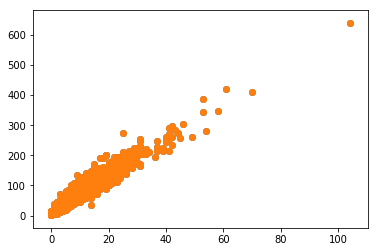

In [48]:
import matplotlib.pyplot as plt
plt.scatter(rawdata['word_ct'], rawdata['len_text'])
plt.show()

In [24]:
teams.head()

,Team Name,Insta_ID,Number of Posts,Number of Followers
0,Atlanta Hawks,atlhawks,7336,1M
1,Boston Celtics,celtics,7822,4.2M
2,Brooklyn Nets,brooklynnets,6363,1.2M
3,Charlotte Hornets,hornets,9653,1M
4,Chicago Bulls,chicagobulls,5202,4.4M


In [21]:
from lxml import html
import requests
from lxml.html import fromstring, tostring


In [42]:
searchquery = 'stephencurry30'
url = 'https://www.instagram.com/' + searchquery + '/?__a=1'
page = requests.get(url)
tree = html.fromstring(page.content)


In [50]:
import urllib.request, json 
with urllib.request.urlopen(url) as u:
    data = json.loads(u.read().decode())
    print(data)

{'logging_page_id': 'profilePage_324599988', 'show_suggested_profiles': True, 'graphql': {'user': {'biography': '@vsonwatch', 'blocked_by_viewer': False, 'country_block': False, 'external_url': 'http://fb.me/StephenvsTheGame', 'external_url_linkshimmed': 'https://l.instagram.com/?u=http%3A%2F%2Ffb.me%2FStephenvsTheGame&e=ATO5G_MDgJUOJZ43Bq_Bb4jIO0lAw12fKgakgMOZlFULA1TTeH3FHag-vrLck7bIEgdMLV-I', 'edge_followed_by': {'count': 25661091}, 'followed_by_viewer': False, 'edge_follow': {'count': 648}, 'follows_viewer': False, 'full_name': 'Wardell Curry', 'has_channel': False, 'has_blocked_viewer': False, 'highlight_reel_count': 4, 'has_requested_viewer': False, 'id': '324599988', 'is_business_account': False, 'is_joined_recently': False, 'business_category_name': None, 'is_private': False, 'is_verified': True, 'edge_mutual_followed_by': {'count': 0, 'edges': []}, 'profile_pic_url': 'https://scontent-sea1-1.cdninstagram.com/vp/eac4ca641e352ef94e652fb39583f44a/5D859F9A/t51.2885-19/s150x150/2227

In [52]:
data['logging_page_id']

'profilePage_324599988'

In [53]:
data['graphql']

{'user': {'biography': '@vsonwatch',
  'blocked_by_viewer': False,
  'country_block': False,
  'external_url': 'http://fb.me/StephenvsTheGame',
  'external_url_linkshimmed': 'https://l.instagram.com/?u=http%3A%2F%2Ffb.me%2FStephenvsTheGame&e=ATO5G_MDgJUOJZ43Bq_Bb4jIO0lAw12fKgakgMOZlFULA1TTeH3FHag-vrLck7bIEgdMLV-I',
  'edge_followed_by': {'count': 25661091},
  'followed_by_viewer': False,
  'edge_follow': {'count': 648},
  'follows_viewer': False,
  'full_name': 'Wardell Curry',
  'has_channel': False,
  'has_blocked_viewer': False,
  'highlight_reel_count': 4,
  'has_requested_viewer': False,
  'id': '324599988',
  'is_business_account': False,
  'is_joined_recently': False,
  'business_category_name': None,
  'is_private': False,
  'is_verified': True,
  'edge_mutual_followed_by': {'count': 0, 'edges': []},
  'profile_pic_url': 'https://scontent-sea1-1.cdninstagram.com/vp/eac4ca641e352ef94e652fb39583f44a/5D859F9A/t51.2885-19/s150x150/22277378_1720913538216240_2580026733478543360_n.jpg

In [54]:
data['graphql']['user']['edge_followed_by']['count']

25661091

In [52]:
rawdata.head()

,Engagements,Followers at Posting,Type,Description,len_text,word_ct,excl_ct,ques_ct,period_ct,comma_ct,caps_ct,tags_ct,player
0,502093,36984682,Video,The @raptors bench trio of @sergeibaka @norman...,95,14,1,0,0,0,2,4,"[@raptors, @sergeibaka, @normanpowell4, @fredv..."
1,603380,36984682,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,11,1,0,0,0,3,2,"[@kyle_lowry7, @raptors]"
2,603380,36984682,Video,@k_mid22 with some english on the @bucks dime!,46,7,1,0,0,0,0,2,"[@k_mid22, @bucks]"
3,725100,36984682,Video,Kawhi punches it home with the left on TNT!,43,8,1,0,0,0,4,0,[]
4,661446,36984682,Video,@giannis_an34 goes baseline early to rock the ...,57,9,1,0,0,0,3,1,[@giannis_an34]
